## Relationship Between Body Mass Index (BMI) and Blood Pressure in lean population
The association between body mass index (BMI) and blood pressure is well known in relatively obese populations. The purpose of the present analysis was to investigate the relationship between BMI and blood pressure in a lean population. <br>

Source: https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1 (Korea Sports Promotion Foundation).

### 1. Importing Python modules, loading data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('bodyPerformance.csv')

### 2. Exploring data

In [52]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


data shape : 13393 records, 12 columns <br>

Columns:<br>
age<br>
gender: F - female, M - male <br>
height_cm: height in cm <br>
weight_kg: weight in cm <br>
body fat_%: body fat percentage <br>
diastolic: diastolic blood pressure <br>
systolic: systolic blood pressure <br>
gripForce: measured grip strenght <br>
sit and bend forward_cm: sit and reach flexibility test result in cm<br>
sit-ups counts: number of sit ups done in 1 minute<br>
broad jump_cm: lenght of a broad jump in cm <br>
class: A,B,C,D ( A: best) / stratified

Renaming columns:

In [29]:
df = df.rename({"body fat_%":"body_fat"}, axis = "columns")
df = df.rename({"sit and bend forward_cm":"sit_bend"}, axis = "columns")
df = df.rename({"sit-ups counts":"sit_ups"}, axis = "columns")
df = df.rename({"broad jump_cm":"broad_jump"}, axis = "columns")
df.head()

,age,gender,height_cm,weight_kg,body_fat,diastolic,systolic,gripForce,sit_bend,sit_ups,broad_jump,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Adding a BMI (Body Mass Index) column
Body mass index (BMI) is calculated as the weight in
kilograms divided by the square of the height in meters
(kg/m2). <br>A BMI of over 25 kg/m2 is defined as overweight,
and a BMI of over 30 kg/m2 as obese.<br>We want this column to be placed after weight.

In [30]:
df['BMI'] = df.weight_kg / ((df.height_cm/100)**2)
df = df[['age', 'gender', 'height_cm', 'weight_kg', 'BMI', 'body_fat', 'diastolic', 'systolic', 'gripForce', 'sit_bend', 'sit_ups', 'broad_jump', 'class']]

### 3. Analysis

First let's explore gender distribution using pie chart.

M    8467
F    4926
Name: gender, dtype: int64


(-1.114426420920716,
 1.1006870104643216,
 -1.1196159118179032,
 1.111619653928167)

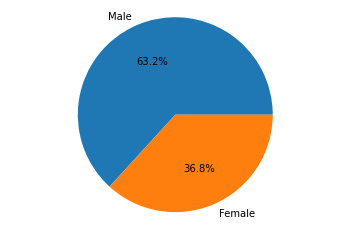

In [148]:
print(df.gender.value_counts())
gender = df.gender.value_counts()
plt.pie(gender, labels = ['Male', 'Female'], autopct='%1.1f%%')
plt.axis('equal')

Now let's take a look at the age distribution:

Text(0.5, 1.0, 'Age distribution')

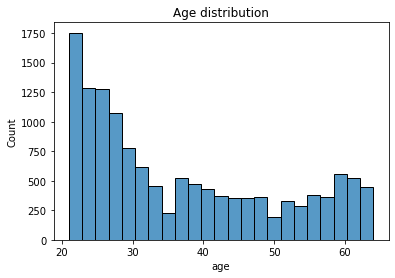

In [149]:
sns.histplot(data = df,x = 'age')
plt.title('Age distribution')

### BMI distribution and summary statistics

Average BMI: 23.60601410497518
Median BMI: 23.46351348927852
Max BMI: 42.90650887573965
Min BMI: 11.103975856663292


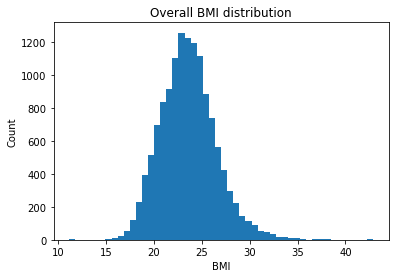

In [173]:
plt.hist(df.BMI, bins=50)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Overall BMI distribution')
print("Average BMI: " + str(np.mean(df.BMI)))
print("Median BMI: " + str(np.median(df.BMI)))
print("Max BMI: " + str(max(df.BMI)))
print("Min BMI: " + str(min(df.BMI)))

Average BMI for females: 22.1 ± 2.84  |  Males: 24.48 ± 2.63
Median BMI for females: 21.74 | Males: 24.29
Min BMI for females: 11.1 | Males: 11.31
Max BMI for females: 42.91 | Males: 39.95


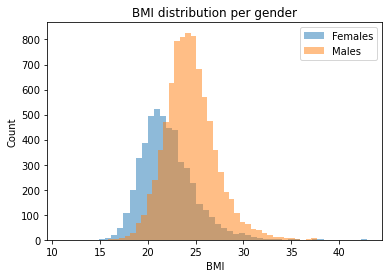

In [80]:
plt.hist(df.BMI[df.gender=='F'], alpha = 0.5, label = "Females", bins=50)
plt.hist(df.BMI[df.gender=='M'], alpha = 0.5, label = "Males", bins=50)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI distribution per gender')
plt.legend()
print("Average BMI for females: " + str(round(np.mean(df.BMI[df.gender=='F']), 2)) + " ± " + str(round(np.std(df.BMI[df.gender=='F']), 2)) + "  |  Males: " + str(round(np.mean(df.BMI[df.gender=='M']), 2)) + " ± " + str(round(np.std(df.BMI[df.gender=='M']), 2)))
print("Median BMI for females: " + str(round(np.median(df.BMI[df.gender=='F']), 2)) + " | Males: " + str(round(np.median(df.BMI[df.gender=='M']), 2)))
print("Min BMI for females: " + str(round(min(df.BMI[df.gender=='F']), 2)) + " | Males: " + str(round(min(df.BMI[df.gender=='M']), 2)))
print("Max BMI for females: " + str(round(max(df.BMI[df.gender=='F']), 2)) + " | Males: " + str(round(max(df.BMI[df.gender=='M']), 2)))

Calculating overweight and obesity percentage.

In [43]:
overweight = df[df.BMI > 25]
obesity = df[df.BMI > 30]

f_overweight = overweight[overweight.gender == 'F']
m_overweight = overweight[overweight.gender == 'M']
f_overweight_percentage = (len(f_overweight)/len(df.BMI))*100
m_overweight_percentage = (len(m_overweight)/len(df.BMI))*100

f_obesity = obesity[obesity.gender == 'F']
m_obesity = obesity[obesity.gender == 'M']
f_obesity_percentage = (len(f_obesity)/len(df.BMI))*100
m_obesity_percentage = (len(m_obesity)/len(df.BMI))*100
print(f_obesity_percentage, m_obesity_percentage)

# initialize data of lists.
data = {'Gender':['Male', 'Female', 'Total'],
        'Overweight %': [m_overweight_percentage, f_overweight_percentage, m_overweight_percentage+f_overweight_percentage],
        'Obese %': [m_obesity_percentage, f_obesity_percentage, m_obesity_percentage+f_obesity_percentage]}
  
# Create DataFrame
df1 = pd.DataFrame(data)
df1

0.5674606137534532 1.9935787351601584


,Gender,Overweight %,Obese %
0,Male,23.810946,1.993579
1,Female,4.666617,0.567461
2,Total,28.477563,2.561039


The obesity level is very low (2,56%) in camparison to the world’s adult population level which is 13% (source: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight).

### Correlation between BMI and systolic blood pressure.

<Figure size 432x288 with 0 Axes>

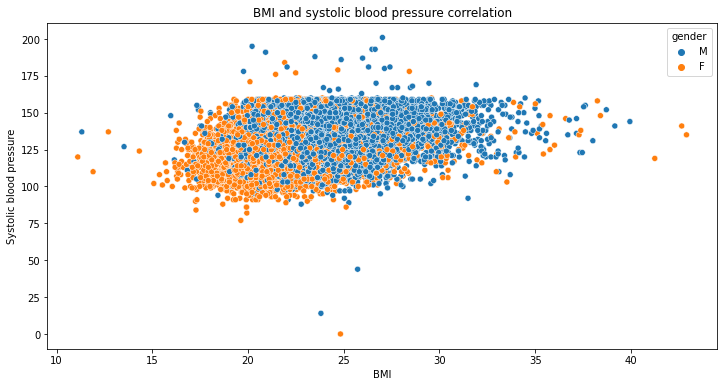

In [167]:
plt.clf()
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.BMI, y=df.systolic, hue=df.gender)
plt.title('BMI and systolic blood pressure correlation')
plt.xlabel('BMI')
plt.ylabel('Systolic blood pressure')

plt.show()

We can see that there are some outliers in our data. Let's remove them by setting the confidence interval to 99% both to systolic and diastolic blood pressure data.

In [174]:
old = df[['systolic', 'diastolic', 'BMI', 'gender', 'weight_kg']]
new_s = old[old['systolic'].between(old['systolic'].quantile(.01), old['systolic'].quantile(.99))]
new_d = old[old['diastolic'].between(old['diastolic'].quantile(.01), old['diastolic'].quantile(.99))]

Now let's see the correlation between BMI and systolic blood pressure:

<Figure size 432x288 with 0 Axes>

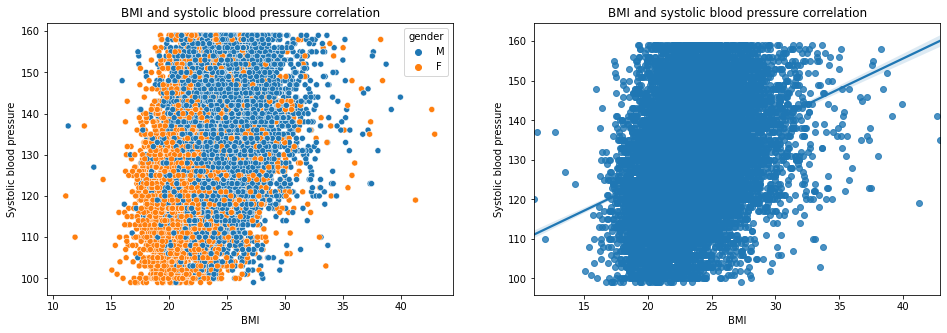

Pearsons correlation BMI and systolic: 0.339


In [164]:
plt.clf()

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=new_s.BMI, y=new_s.systolic, hue=new_s.gender)
#sns.regplot(x=new.BMI, y=new.systolic)
plt.title('BMI and systolic blood pressure correlation')
plt.xlabel('BMI')
plt.ylabel('Systolic blood pressure')

plt.subplot(1, 2, 2)
sns.regplot(x=new_s.BMI, y=new_s.systolic)
plt.title('BMI and systolic blood pressure correlation')
plt.xlabel('BMI')
plt.ylabel('Systolic blood pressure')

plt.show()

corr, _ = pearsonr(new_s.weight_kg, new_s.systolic)
print('Pearsons correlation BMI and systolic: %.3f' % corr)

BMI and diastolic blood pressure.

<Figure size 432x288 with 0 Axes>

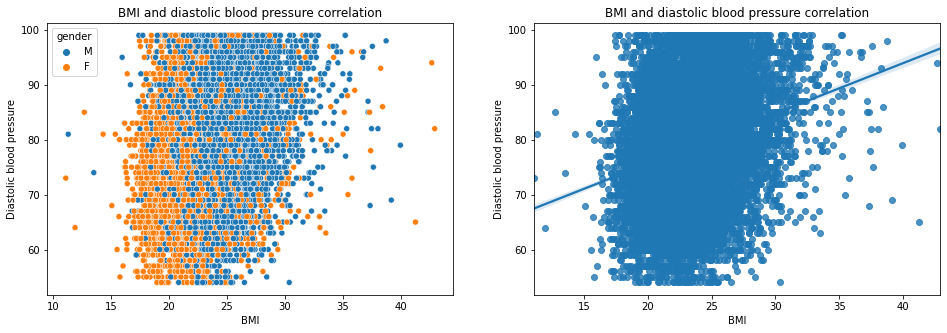

Pearsons correlation BMI and diastolic: 0.264


In [165]:
plt.clf()

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=new_d.BMI, y=new_d.diastolic, hue=new_d.gender)
plt.title('BMI and diastolic blood pressure correlation')
plt.xlabel('BMI')
plt.ylabel('Diastolic blood pressure')

plt.subplot(1, 2, 2)
sns.regplot(x=new_d.BMI, y=new_d.diastolic)
plt.title('BMI and diastolic blood pressure correlation')
plt.xlabel('BMI')
plt.ylabel('Diastolic blood pressure')

plt.show()

corr, _ = pearsonr(new_d.weight_kg, new_d.diastolic)
print('Pearsons correlation BMI and diastolic: %.3f' % corr)

A correlation larger than about .3 indicates a linear association. We can see that there is a linear correlation between BMI and systolic blood pressure (0.339) and weak positive correlation between BMI and diastolic blood pressure (0.264).